In [1]:
import time
import matplotlib.pyplot as plt

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [ ]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 2000
generations = 100
mutation_rate = 0.1
crossover_probability = 0.7
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size, mutation_rate, crossover_probability)

# Run optimzation and write to file

solution = ga.solve_tsp(tsp_data)
improvement = ga.population_fitness
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
print(improvement)
plt.plot(improvement)
plt.show()

In [ ]:
best = ga.population.take_best_chromosome()
print(best.get_products())
print(best.get_score())

In [ ]:
print(tsp_data.get_distances())
print(tsp_data.get_start_distances())
print(tsp_data.get_end_distances())

In [ ]:
from GeneticAlgorithm import Chromosome
from GeneticAlgorithm import Population

chromosome = Chromosome()
chromosome.create_chromosome(4)
print(chromosome.products)
distances = [
    [0, 1, 3, 6],
    [5, 0, 3, 2],
    [9, 4, 0, 8],
    [2, 6, 7 ,0]
]
# print(chromosome.fitness_function(distances))

population = Population(0.1, 0.7, tsp_data)
population.create_random_population(population_size, len(tsp_data.get_start_distances()))
print(population.chromosomes)
print(population.calculate_population_fitness())
print(ga.roulette(population))

### Part 2: Path Finding Through Ant Colony Optimization

In [ ]:
# Please keep your parameters for the ACO easily changeable here
no_ants = 25
no_gen = 20
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1.5
convergence_steps = 5

# Construct the optimization objects
maze = Maze.create_maze("./../data/medium_maze.txt")

spec = PathSpecification.read_coordinates("./../data/medium_coordinates.txt")
aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, straight_factor, convergence_steps)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/medium_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

In [ ]:
plt.plot(list(range(1, no_gen + 1)), list(map(lambda x: x.size(), best_routes)), label="best routes")
plt.plot(list(range(1, no_gen + 1)), avg_routes, '-.', label="average routes")

plt.xlabel("generation")
plt.ylabel("length of the path")

plt.legend()
plt.show()

In [2]:
no_ants = 25
no_gen = 25
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1
convergence_steps = 100

mazes = [Maze.create_maze("./../data/hard_maze.txt")]

specs = [PathSpecification.read_coordinates("./../data/hard_coordinates.txt")]

maze_types = ["hard"]

Ready reading maze file ./../data/hard_maze.txt


hard 2
hard 4
hard 6
hard 8
hard 10


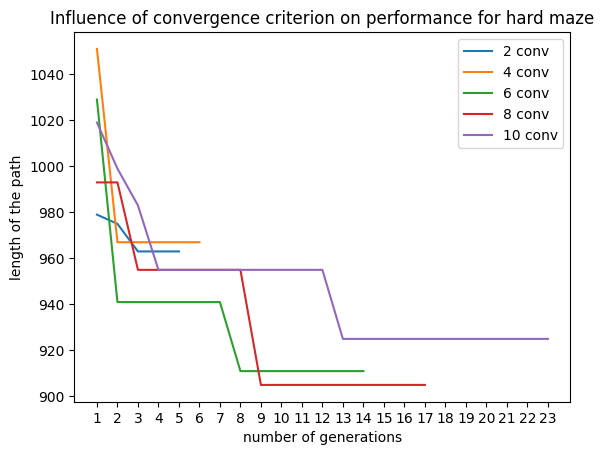

In [3]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):
  
  parameters = [2, 4, 6, 8, 10]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, straight_factor, param)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " conv")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of convergence criterion on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

  plt.show()

hard 10
hard 15
hard 20
hard 25
hard 40


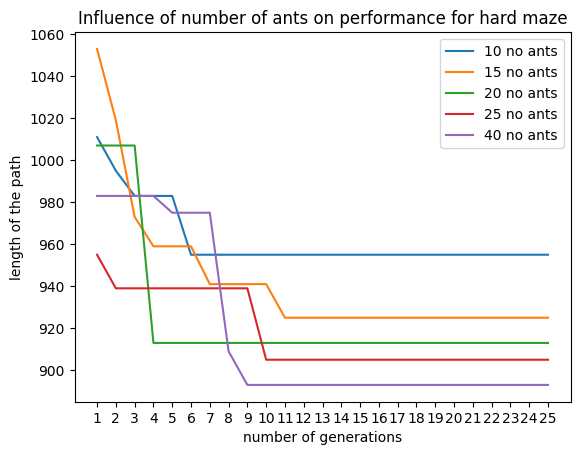

In [4]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [10, 15, 20, 25, 40]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, param, no_gen, q, evap, straight_factor, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " no ants")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of number of ants on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

  plt.show()

hard 10
hard 15
hard 20
hard 25
hard 40


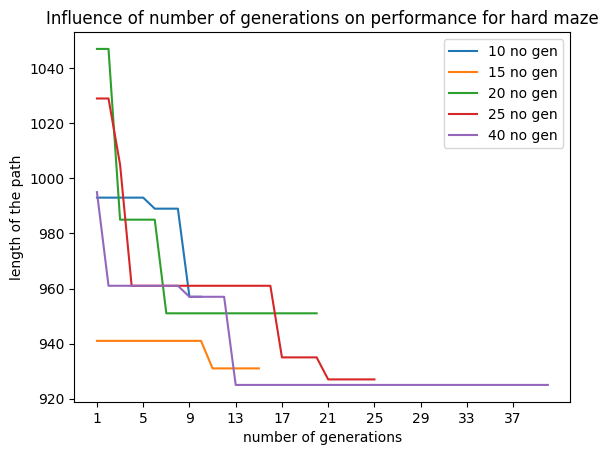

In [12]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [10, 15, 20, 25, 40]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, param, q, evap, straight_factor, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " no gen")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of number of generations on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, 41, 4)))
  plt.legend()

  plt.show()

hard 400
hard 700
hard 1000
hard 1500
hard 2000


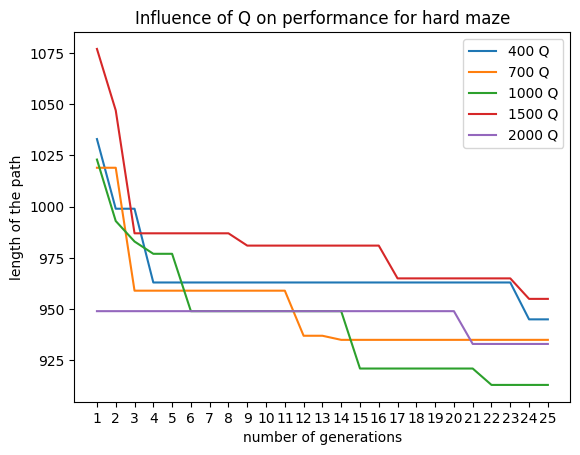

In [10]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [400, 700, 1000, 1500, 2000]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, param, evap, straight_factor, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)
    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " Q")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of Q on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

  plt.show()

hard 0.1
hard 0.2
hard 0.3
hard 0.4


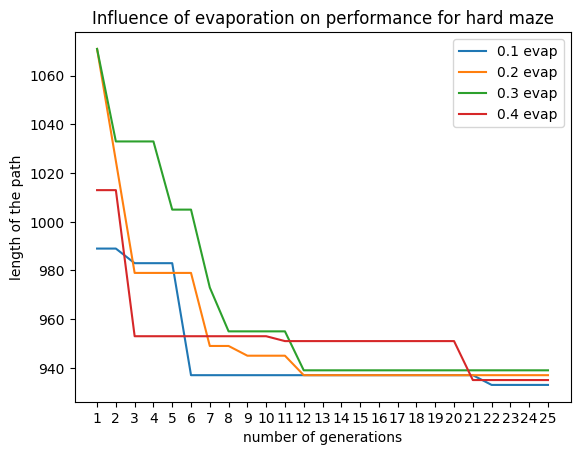

In [7]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [0.1, 0.2, 0.3, 0.4]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, q, param, straight_factor, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " evap")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of evaporation on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

  plt.show()


hard 1.0
hard 1.2
hard 1.5
hard 1.7
hard 2


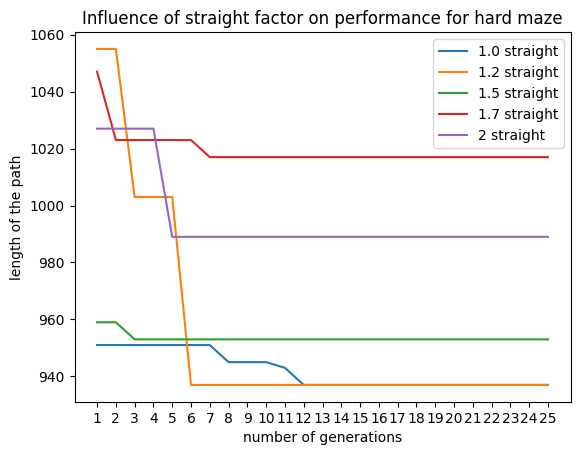

In [11]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [1.0, 1.2, 1.5, 1.7, 2]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, param, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " straight")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of straight factor on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

### Synthesis

In [ ]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 1
no_gen = 1
q = 1000
evap = 0.1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")